In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as stats
import requests
import json
import time
from datetime import datetime
from pprint import pprint
from config import api_key

In [3]:
popular_movies_file_path = "Resources/Popular movies.csv"
genre_movies_file_path = "Resources/Popular movies with genre.csv"

In [4]:
movies = pd.read_csv(popular_movies_file_path, index_col=0)
movie_genre = pd.read_csv(genre_movies_file_path,  index_col=0)

In [5]:
movies.head()

,movie id,overview,popularity rank,release year,title,budget,revenue,actor id,actor name,character,gender
1,169,Ten years after a band of mercenaries first ba...,2,1990,Predator 2,35000000,57120318,1109.0,Kevin Peter Hall,The Predator,Male
2,162,A small suburban town receives a visit from a ...,3,1990,Edward Scissorhands,20000000,53000000,85.0,Johnny Depp,Edward Scissorhands,Male
3,1573,Off-duty cop John McClane is gripped with a fe...,4,1990,Die Hard 2,70000000,240031094,62.0,Bruce Willis,John McClane,Male
4,242,In the midst of trying to legitimize his busin...,5,1990,The Godfather: Part III,54000000,136766062,1158.0,Al Pacino,Don Michael Corleone,Male
5,1669,"A new, technologically-superior Soviet sub, th...",6,1990,The Hunt for Red October,30000000,199200000,7447.0,Alec Baldwin,Jack Ryan,Male


### Gender analysis by years

In [6]:
gender_year = movies[["actor name", "gender", "release year"]]

gender_year_grouped = gender_year.groupby(["release year", "gender"])

gender_year_analysis = gender_year_grouped["gender"].count().reset_index(name="count")
gender_year_analysis_df = pd.DataFrame(gender_year_analysis)

In [7]:
gender_year_analysis_df.head()

,release year,gender,count
0,1990,Female,19
1,1990,Male,76
2,1991,Female,21
3,1991,Male,75
4,1992,Female,22


### Plot Graph - Gender analysis by years

In [8]:
gender_pivot = pd.pivot_table(gender_year_analysis_df, index=["release year"], columns = "gender", values = "count")
gender_pivot_percent = gender_pivot.div(gender_pivot.sum(1), axis=0)

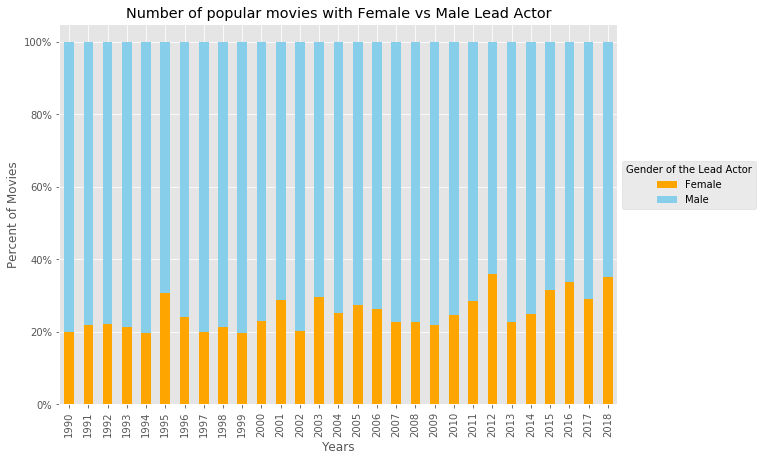

In [9]:
colors = ["orange", "skyblue"]
ax = gender_pivot_percent.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Number of popular movies with Female vs Male Lead Actor")
plt.xlabel("Years")
plt.ylabel("Percent of Movies")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(y) for y in vals])
plt.legend(loc='lower left',  bbox_to_anchor=(1.0, 0.5), title ="Gender of the Lead Actor")
plt.savefig("Resources/Are movies male centric.png", bbox_inches='tight')
plt.show()

### Gender analysis by genre


In [10]:
movie_genre.head()

,genre,movie id,title
0,Adventure,71805,Shipwrecked
1,Family,71805,Shipwrecked
2,Science Fiction,169,Predator 2
3,Action,169,Predator 2
4,Thriller,169,Predator 2


In [11]:
cast_genre_df = pd.merge(movie_genre[["movie id", "genre"]], 
                         movies[["movie id", "gender", "actor name", "release year"]], 
                         on='movie id', how='inner')
cast_genre_df.head()

,movie id,genre,gender,actor name,release year
0,169,Science Fiction,Male,Kevin Peter Hall,1990
1,169,Action,Male,Kevin Peter Hall,1990
2,169,Thriller,Male,Kevin Peter Hall,1990
3,162,Fantasy,Male,Johnny Depp,1990
4,162,Drama,Male,Johnny Depp,1990


In [12]:
cast_genre_grouped = cast_genre_df.groupby(["genre","gender"])

gender_genre_analysis = cast_genre_grouped["gender"].count().reset_index(name="count")
gender_genre_analysis_df = pd.DataFrame(gender_genre_analysis)
gender_genre_analysis_df.head()

,genre,gender,count
0,Action,Female,128
1,Action,Male,812
2,Adventure,Female,106
3,Adventure,Male,583
4,Animation,Female,93


In [13]:
genre_pivot = pd.pivot_table(gender_genre_analysis_df, index=["genre"], columns = "gender", values = "count")

In [14]:
genre_pivot_percent  = genre_pivot.div(genre_pivot.sum(1), axis=0)

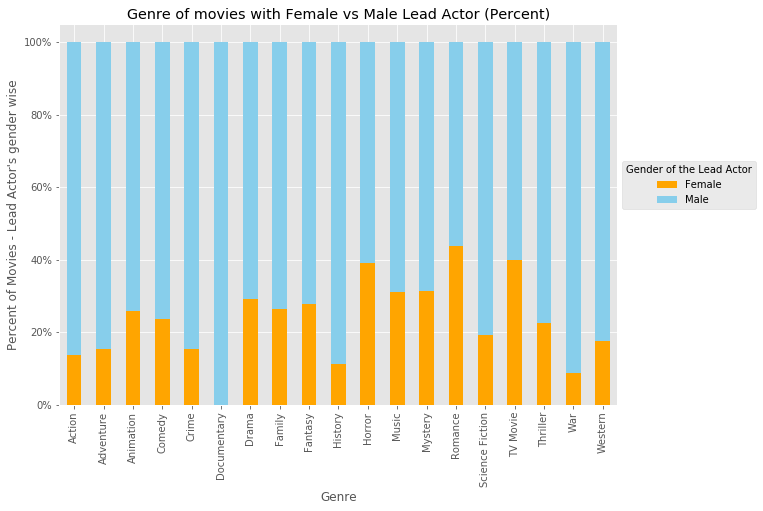

In [15]:
bx = genre_pivot_percent.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Genre of movies with Female vs Male Lead Actor (Percent)")
plt.xlabel("Genre")
plt.ylabel("Percent of Movies - Lead Actor's gender wise")
vals = bx.get_yticks()
bx.set_yticklabels(['{:,.0%}'.format(y) for y in vals])
plt.legend(loc='lower left',  bbox_to_anchor=(1.0, 0.5), title ="Gender of the Lead Actor")
plt.savefig("Resources/Percent gender analysis by genre.png", bbox_inches='tight')
plt.show()

### Top actors in movies

In [16]:
df_female = movies.loc[movies["gender"]=="Female",:]
df_male = movies.loc[movies["gender"]=="Male",:]

In [17]:
df_female_top = (pd.DataFrame(df_female["actor name"].value_counts())).rename(columns={"actor name":  "Number of Movies"})
df_female_top.sort_values(by="Number of Movies", ascending=False, inplace=True)
df_female_top = df_female_top.head(5)
df_female_top.reset_index(inplace=True)
df_male_top = (pd.DataFrame(df_male["actor name"].value_counts())).rename(columns={"actor name":  "Number of Movies"})
df_male_top.sort_values(by="Number of Movies", ascending=False, inplace=True)
df_male_top = df_male_top.head(5)
df_male_top.reset_index(inplace=True)

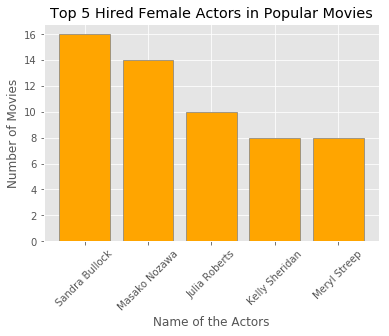

In [18]:
x_ticks = np.arange(0,5,1)
#plt.subplot(1,3,1)
plt.bar(x_ticks,df_female_top["Number of Movies"], align='center', color= "orange", edgecolor='grey',linewidth=0.7)
plt.xticks(x_ticks,df_female_top["index"], rotation=45)
plt.title("Top 5 Hired Female Actors in Popular Movies")
plt.xlabel("Name of the Actors")
plt.ylabel("Number of Movies")
plt.savefig("Resources/Top 5 hired female actors.png")
plt.figsize=(10,7)

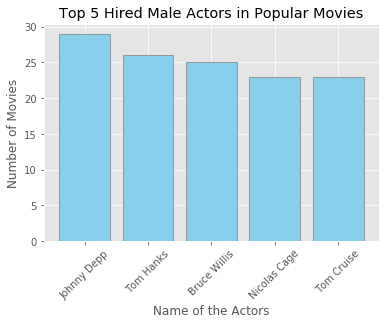

In [19]:
#plt.subplot(1,3,3)
plt.bar(x_ticks,df_male_top["Number of Movies"], align='center', color= "skyblue", edgecolor='grey',linewidth=0.7)
plt.xticks(x_ticks,df_male_top["index"], rotation=45)
plt.title("Top 5 Hired Male Actors in Popular Movies")
plt.xlabel("Name of the Actors")
plt.ylabel("Number of Movies")
plt.savefig("Resources/Top 5 hired male actors.png")
plt.figsize=(10,7)

### Gender analysis by revenue

In [49]:
movies_revenue_analysis = movies[["movie id", "gender", "release year", "budget", "revenue"]]

In [50]:
movies_revenue_analysis = movies_revenue_analysis[movies["budget"] != 0]
movies_revenue_analysis = movies_revenue_analysis[movies["revenue"] != 0]

In [51]:
movies_revenue_analysis["revenue-budget ratio"] = (movies_revenue_analysis["revenue"]/movies_revenue_analysis["budget"]).round(3)

In [52]:
# Establish bins for decades
decade_bins = [1989, 1999, 2009, 2019]
decade_names = ["1990s","2000s", "2010s"]

In [53]:
movies_revenue_analysis["decade"] = pd.cut(movies_revenue_analysis[ "release year"], decade_bins, labels = decade_names)
movies_revenue_analysis.head()

,movie id,gender,release year,budget,revenue,revenue-budget ratio,decade
1,169,Male,1990,35000000,57120318,1.632,1990s
2,162,Male,1990,20000000,53000000,2.650,1990s
3,1573,Male,1990,70000000,240031094,3.429,1990s
4,242,Male,1990,54000000,136766062,2.533,1990s
5,1669,Male,1990,30000000,199200000,6.640,1990s


In [54]:
gender_revenue_grouped = movies_revenue_analysis.groupby(["decade", "gender"])
revenue_year_analysis = gender_revenue_grouped["revenue-budget ratio"].mean().reset_index(name="average ratio")
revenue_year_analysis_df = pd.DataFrame(revenue_year_analysis)

In [55]:
revenue_decade_pivot = pd.pivot_table(revenue_year_analysis_df, 
                                      index = ["decade"], 
                                      columns = "gender", 
                                      values = "average ratio")
revenue_decade_pivot

gender,Female,Male
decade,,
1990s,40.316920,4.358742
2000s,94.079371,4.112989
2010s,5.114977,3.922031


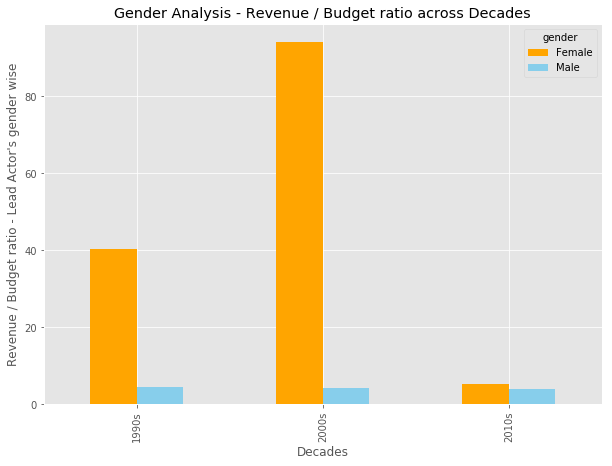

In [56]:
revenue_decade_pivot.plot.bar(color = ["orange", "skyblue"], figsize=(10,7))
plt.title("Gender Analysis - Revenue / Budget ratio across Decades")
plt.xlabel("Decades")
plt.ylabel("Revenue / Budget ratio - Lead Actor's gender wise")
plt.savefig("Resources/gender analysis by revenue across decades.png", bbox_inches='tight')
plt.show()

### Hypothesis test

* Hypothesis - If gender of the lead actor is related to revenue of the movie, then casting male lead actor will lead to 10% more revenue over budget as compared to revenue over budget for female lead actor.

* Null Hypothesis - If gender of the lead actor is not related to revenue of the movie, then casting male lead actor will not lead to 10% more revenue over budget as compared to revenue over budget for female lead actor.

In [57]:
population1 = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Female"), "revenue-budget ratio"]

In [58]:
population2 = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Male"), "revenue-budget ratio"]

In [62]:
(t_stat, p) = stats.ttest_ind(population1, population2, equal_var=False)
print(f"statistic= {t_stat}, pvalue= {p}")

statistic= 1.2665929250632164, pvalue= 0.20598331045613813


In [60]:
if p < 0.05:
    print("The differences between box office performance for male vs female lead cast are significant.")
else:
    print("The differences between box office performance for male vs female lead cast are due to chance.")

The differences between box office performance for male vs female lead cast are due to chance.
